<a href="https://colab.research.google.com/github/ismaelclebson/MachineLearn-DataScience/blob/main/Curso_DS_A_a_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRÉ-PROCESSAMENTO DE DADOS

##MANIPULAÇÃO DE DADOS COM PANDAS

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from pandas._libs.algos import backfill
bc = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A à Z/Bases de dados/credit_data.csv')

In [ ]:
bc_filtrado = bc[~np.isnan(bc['age'])]
nan_bc_filtrado = bc.isnull().sum()/len(bc)
nan_bc_filtrado

print("Quantidade de tuplas:", len(bc_filtrado))
print("Percentual médio missing values:", round(nan_bc_filtrado.mean()*100,1),"%")
# print("Percentual médio missing values: ", round())

Quantidade de tuplas: 1997
Percentual médio missing values: 0.0 %


##VISUALIZAÇÃO DE DADOS

In [ ]:
bc

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
idade = bc['age']

idade.dropna()
len(idade)

2000

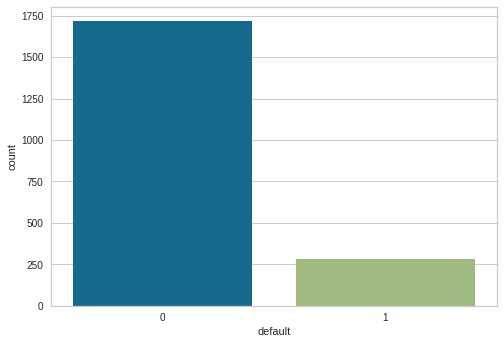

In [ ]:
sns.countplot(x = bc['default']);

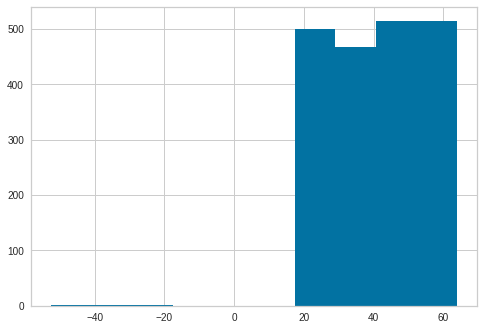

In [ ]:
plt.hist(x = bc['age']);

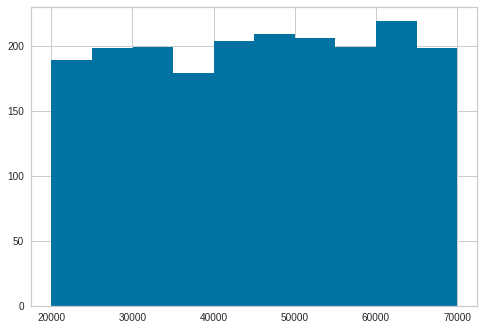

In [ ]:
plt.hist(x = bc['income']);

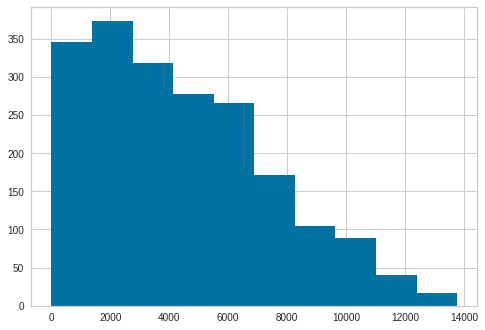

In [ ]:
plt.hist(x = bc['loan']);

In [ ]:
#bc_clean = bc.drop(bc['age']<0)
plot = px.scatter_matrix(bc, dimensions=['age', 'income', 'loan'], color = 'default')
plot.show()

##TRATAMENTO DE DADOS INCONSISTENTES

In [ ]:
bc.loc[bc['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
bc[bc['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
# Apagar toda a coluna
bc2 = bc.drop('age', axis = 1) # axis = 0 para linhas e 1 para colunas
bc2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [ ]:
# Apagar somente os dados inconsistentes
bc3 = bc.drop(bc[bc['age']<0].index)
bc3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
bc[bc['age']<0].index # retorna os index dos registros dentro da restrição

Int64Index([15, 21, 26], dtype='int64')

In [ ]:
# Preencher os dados errados manualmente

In [ ]:
bc['age'].mean()

40.80755937840458

In [ ]:
# Preencher com a média
bc['age'][bc['age']>0].mean()

40.92770044906149

In [ ]:
bc.loc[bc['age']<0, 'age'] = 40.92
bc.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [ ]:
bc['age'].mean()

40.92768888103586

##TRATAMENTO DE DADOS FALTANTES

In [ ]:
bc.isnull().sum() #mostra os somatórios de cada coluna mostrando a quantidade de itens faltantes em cada

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
bc.loc[pd.isnull(bc['age'])] #mostra os itens faltantes da coluna 'age'

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
bc['age'].fillna(bc['age'].mean(), inplace = True) # substituir os valores nan pela média e registrar no banco de dados atravéns do inplace = true

In [ ]:
bc.loc[pd.isnull(bc['age'])]

,clientid,income,age,loan,default


In [ ]:
bc.loc[(bc['clientid'] == 29) | (bc['clientid'] == 31) | (bc['clientid'] == 32) ]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [ ]:
bc.loc[bc['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


##PREDITORES E CLASSE

In [ ]:
X = bc.iloc[:, 1:4].values # Preditores 
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
y = bc.iloc[:, 4].values # classes que são as respostas
y

array([0, 0, 0, ..., 1, 0, 0])

##ESCALONAMENTO DOS VALORES

In [ ]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
X[:,0]

array([66155.92509508, 34415.15396582, 57317.17006303, ...,
       44311.44926231, 43756.05660491, 69436.57955155])

In [ ]:
X[:,0].min(), X[:,1].min(), X[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
X[:,0].max(), X[:,1].max(), X[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier


modelo = KNeighborsClassifier()

num_folds = 10
random_state = 7

kfold = KFold(num_folds, shuffle=True, random_state = random_state)

results = cross_val_score(modelo, X, y, cv = kfold)
results10 = cross_val_score(modelo, X, y, cv = 10)

print("Acurácia sem escalonamento 1: %.3f" %(results.mean()*100))
print("Acurácia sem escalonamento 2: %.3f" %(results10.mean()*100))

X

Acurácia sem escalonamento 1: 84.250
Acurácia sem escalonamento 2: 83.450


array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
# Dados padronizados
scaler_X = StandardScaler()
X_padronizado = scaler_X.fit_transform(X)

kfold = KFold(num_folds, shuffle=True, random_state = random_state)

results = cross_val_score(modelo, X_padronizado, y, cv = kfold)
results10 = cross_val_score(modelo, X_padronizado, y, cv = 10)

print("Acurácia 1: %.3f" %(results.mean()*100))
print("Acurácia 2: %.3f" %(results10.mean()*100))
X_padronizado

X_credit, y_credit = X_padronizado, y

Acurácia 1: 98.050
Acurácia 2: 98.000


In [ ]:
X_padronizado[:,0].min(), X_padronizado[:,1].min(), X_padronizado[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [ ]:
X_padronizado[:,0].max(), X_padronizado[:,1].max(), X_padronizado[:,2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [ ]:
# Dados Normalizados
scaler_X_minmax = MinMaxScaler()
X_normalizado = scaler_X_minmax.fit_transform(X)
X_normalizado

array([[0.9231759 , 0.89209175, 0.58883739],
       [0.28812165, 0.65470788, 0.47682695],
       [0.74633429, 0.9811888 , 0.58262011],
       ...,
       [0.48612202, 0.21695807, 0.40112895],
       [0.47500998, 1.        , 0.1177903 ],
       [0.98881367, 0.82970913, 0.53597028]])

In [ ]:
# Dados Normalizados 2


kfold = KFold(num_folds, shuffle=True, random_state = random_state)

results = cross_val_score(modelo, X_normalizado, y, cv = kfold)
results10 = cross_val_score(modelo, X_normalizado, y, cv = 10)

print("Acurácia 1: %.3f" %(results.mean()*100))
print("Acurácia 2: %.3f" %(results10.mean()*100))

Acurácia 1: 97.650
Acurácia 2: 97.750


In [ ]:
X_normalizado[:,0].min(), X_normalizado[:,1].min(), X_normalizado[:,2].min()

(0.0, 0.0, 0.0)

In [ ]:
X_normalizado[:,0].max(), X_normalizado[:,1].max(), X_normalizado[:,2].max()

(0.9999999999999998, 1.0, 1.0)

## NOVA BASE DE DADOS

In [ ]:
base_census = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A à Z/Bases de dados/census.csv')

In [ ]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

## VISUALIZAÇÃO DOS DADOS

In [ ]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

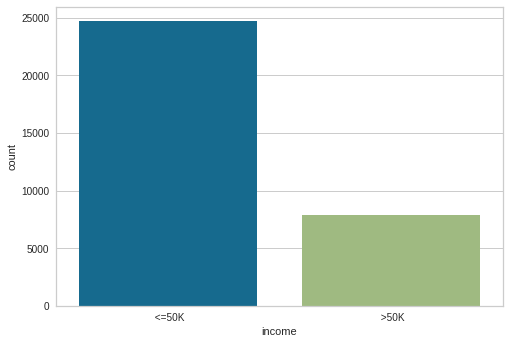

In [ ]:
sns.countplot(x = base_census['income']);

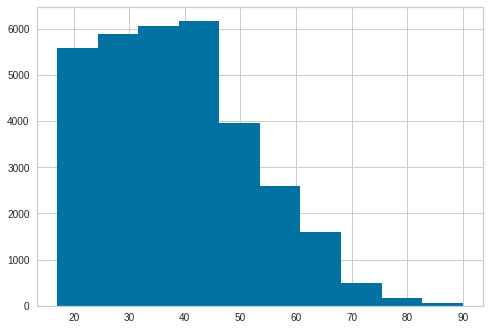

In [ ]:
plt.hist(x = base_census['age']);

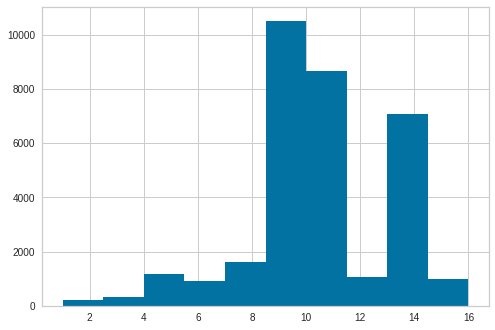

In [ ]:
plt.hist(x = base_census['education-num']);

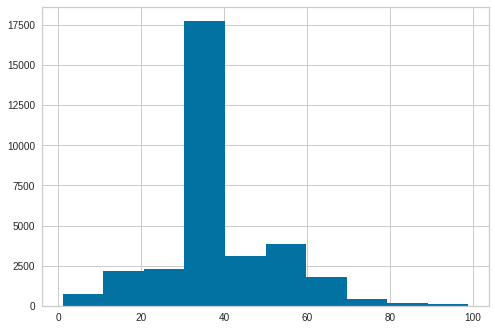

In [ ]:
plt.hist(x = base_census['hour-per-week']);

In [ ]:
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

In [ ]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation','income'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['education','income'])
grafico.show()

## DIVISÃO ENTRE PREVISORES E CLASSE

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
X_census, y_census = base_census.iloc[:, 0:14].values, base_census.iloc[:, 14].values

In [ ]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## TRATAMENTO DE ATRIBUTOS CATEGÓRICOS

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_teste = LabelEncoder()

In [ ]:
X_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [ ]:
teste = label_encoder_teste.fit_transform(X_census[:,1])

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
# Transformando dados de strings para numéricos para aprendizado de máquina
## utilização do label encoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:, 3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:, 5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:, 6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:, 7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:, 8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = label_encoder_country.fit_transform(X_census[:, 13])

In [ ]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
## OneHotEncoder
# Ex carro
# Gol Palio Uno
#   1     2    3

# Gol    1 0 0 
# Pálio  0 1 0
# Uno    0 0 1 # encode

In [ ]:
len(np.unique(base_census['workclass']))

9

In [ ]:
len(np.unique(base_census['occupation']))

15

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')


In [ ]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()


In [ ]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
X_census.shape

(32561, 108)

## ESCALONAMENTO DOS VALORES

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

## DIVISÃO DAS BASES EM TREINAMENTO E TESTE

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## DADOS CREDIT
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size=0.25, random_state=0)

In [ ]:
X_credit_treinamento.shape

(1500, 3)

In [ ]:
y_credit_treinamento.shape

(1500,)

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
## DADOS CENSUS
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

## SALVAR AS VARIÁVEIS

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
    pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
    pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

# NAÏVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

## Base risco de crédito

In [ ]:
base_risco_credito = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A à Z/Bases de dados/risco_credito.csv')
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
X_risco_credito[:, 0] = label_encoder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = label_encoder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_encoder_garantia.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_encoder_renda.fit_transform(X_risco_credito[:, 3])


In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, y_risco_credito], f)

In [ ]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
# historia boa (0), divida alta (0), garantia nenhuma (1), renda > 35 (2)
# historia ruim (2), divida alta (0), garantia adequada (0), renda < 15 (0)
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
# tipos de classe
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
# quantidade de cada classe da base de dados
naive_risco_credito.class_count_

array([6., 5., 3.])

## Base credit data - 93,8%

In [ ]:
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)




In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsoes = naive_credit_data.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.938

In [ ]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.938

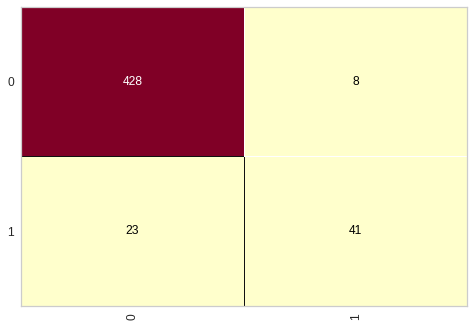

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))
#recall é a chance que o algoritmo tem de identificar a classe específica
#precision é a chance de ser certo a escolha do algortimo sobre a decisão de ter optado por determinada classe

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



## Base census - 47,67%

In [ ]:
with open('census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

0.4767656090071648

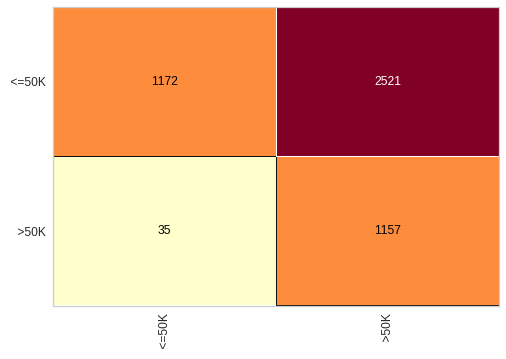

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# ÁRVORES DE DECISÃO

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## BASE RISCO CRÉDITO

In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_risco_credito.feature_importances_

array([0.48015651, 0.06408636, 0.03885431, 0.41690281])

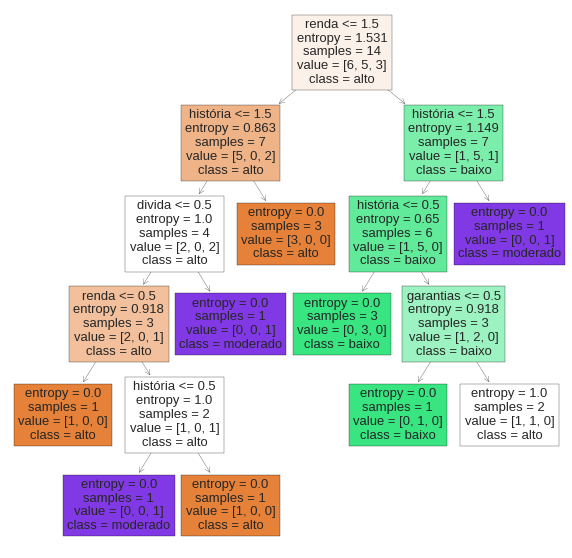

In [ ]:
from IPython.core.pylabtools import figsize
from sklearn import tree
previsores = ['história', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True);

In [ ]:
# historia boa (0), divida alta (0), garantia nenhuma (1), renda > 35 (2)
# historia ruim (2), divida alta (0), garantia adequada (0), renda < 15 (0)
previsoes = arvore_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes

array(['baixo', 'alto'], dtype=object)

## Base credit data - 98,2%

In [ ]:
with open('credit.pkl','rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(y_credit_teste, previsoes)
accuracy

0.982

0.982

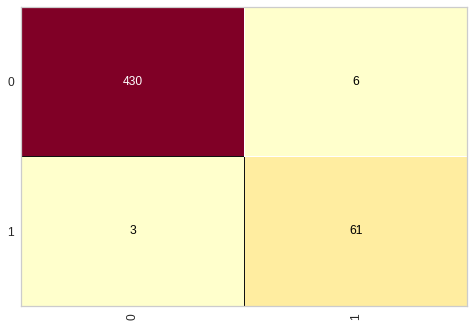

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



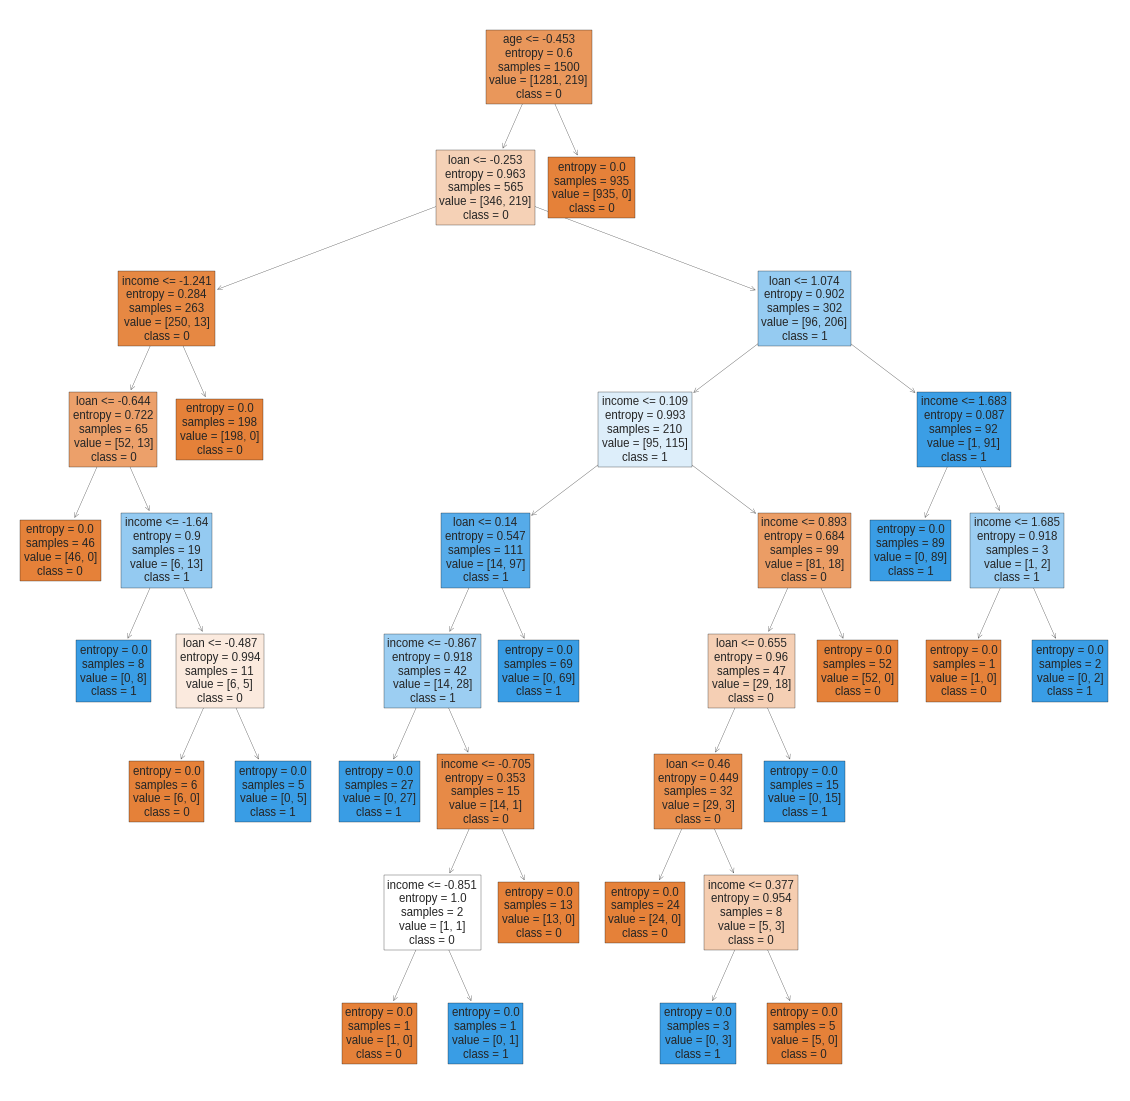

In [ ]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

## Base census

In [ ]:
with open('census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape  

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)